In [1]:
import pandas as pd

# Read csv file

In [2]:
df = pd.read_csv("bi.csv",  encoding_errors="ignore")

In [3]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


# Data cleaning

### Check dataset structure

In [4]:
df.shape

(77, 11)

### Checking data types and null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


- Data types are all good
- 2 null cells in python column

### Data consistency

#### Checking gender

In [6]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [7]:
df['gender'] = df['gender'].str.strip().str.upper()
df['gender'] = df['gender'].replace({
    'M': 'Male',
    "MALE": 'Male',
    'F': 'Female',
    'FEMALE':'Female'
})

In [8]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

#### Checking country

In [9]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [10]:
df['country'].value_counts()

country
Norway          47
Uganda           4
Kenya            3
Germany          3
Italy            2
Spain            2
Netherlands      2
Denmark          2
UK               2
Somali           2
Nigeria          2
France           2
norway           1
Norge            1
South Africa     1
Rsa              1
Name: count, dtype: int64

In [11]:
# Fixing norway, and south africa
df['country'] = df['country'].str.strip().str.upper().replace({
    'NORWAY': 'Norway',
    'NORGE': 'Norway',
    'RSA': 'SOUTH AFRICA'
}) 

In [12]:
df['country'].unique()

array(['Norway', 'KENYA', 'UGANDA', 'SOUTH AFRICA', 'DENMARK',
       'NETHERLANDS', 'ITALY', 'SPAIN', 'UK', 'SOMALI', 'NIGERIA',
       'GERMANY', 'FRANCE'], dtype=object)

#### Ckeking prevEducation

In [13]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [14]:
df['prevEducation'] = df['prevEducation'].str.strip().str.lower()

df['prevEducation'] = df['prevEducation'].replace({
    'bachelors': 'Bachelors',
    'barrrchelors' : 'Bachelors', 
    "diploma": 'Diploma',
    'diplomaaa': 'Diploma',
    'highschool': 'High School',
    'high school': 'High School',
    'masters': 'Masters',
    'doctorate': "Doctorate"
})

In [15]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'High School', 'Bachelors', 'Doctorate'],
      dtype=object)

#### Checking residence

In [16]:
df['residence'].unique()

array(['Private', 'Sognsvann', 'BI Residence', 'BI-Residence',
       'BIResidence', 'BI_Residence'], dtype=object)

In [17]:
df['residence'] = df['residence'].str.strip()

df['residence'] = df['residence'].replace({
    'BI Residence': 'BI-Residence',
    'BIResidence':'BI-Residence',
    'BI_Residence':'BI-Residence'
})

In [18]:
df['residence'].unique()

array(['Private', 'Sognsvann', 'BI-Residence'], dtype=object)

### Checking for duplicates

In [19]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
72    False
73    False
74    False
75    False
76    False
Length: 77, dtype: bool

In [20]:
df.duplicated().sum()

np.int64(0)

#### No duplicated rows

In [21]:
# Just to make sure
df.drop_duplicates(inplace=True)

# Missing data

In [22]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [23]:
# since python is a numeric column so we can use mean or median
df["Python"] = df["Python"].fillna(df["Python"].median())

In [24]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

# Outliers

### Identifying outliers

In [25]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,149.714286,75.987013,69.467532
std,10.341966,16.475784,12.743272,15.228517,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


#### Python, DB, and entryExam are correct: between 0 - 100

#### Checking studyHOURS oultiers

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='studyHOURS'>

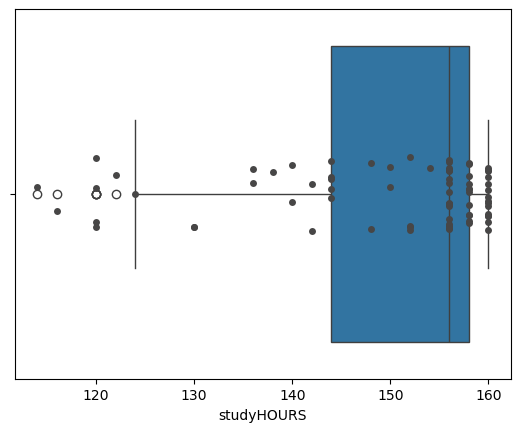

In [27]:
sns.boxplot(x='studyHOURS', data=df)
sns.stripplot(x='studyHOURS', data=df, color="#474646")


#### Fixing the outlier

In [28]:
# pip install datasist

In [29]:
from datasist.structdata import detect_outliers

# replacing the outliers of each column with the median of that column
outlier_ind = detect_outliers(df, 0, ['studyHOURS'])
median = df['studyHOURS'].median()              
df.loc[outlier_ind, 'studyHOURS'] = median

print(len(outlier_ind))

# df.drop(outlier_ind, inplace = True)   # If we wanted to drop these rows

7


In [30]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,153.090909,75.987013,69.467532
std,10.341966,16.475784,8.134044,15.228517,17.033701
min,21.000000,28.000000,124.000000,15.000000,30.000000
25%,27.000000,69.000000,152.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


# Saving the cleaned data in anew csv file

In [31]:
df.to_csv('cleaned_students.csv', index=False, encoding='utf-8')


# Feature Engineering
 

### Adding programming average

In [32]:
df['Programming Average'] = (df['Python'] + df['DB'])/2

In [33]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0
1,Alex,Walekhwa,60,Male,KENYA,Private,79,Diploma,150,60.0,75,67.5
2,Philip,Leo,25,Male,UGANDA,Sognsvann,55,High School,130,74.0,50,62.0
3,Shoni,Hlongwane,22,Female,SOUTH AFRICA,Sognsvann,40,High School,156,81.0,44,62.5
4,Maria,Kedibone,23,Female,SOUTH AFRICA,Sognsvann,65,High School,156,91.0,80,85.5


### Adding the binary feature isadult

In [34]:
df["isAdult"] = df["Age"] >= 25
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average,isAdult
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0,True
1,Alex,Walekhwa,60,Male,KENYA,Private,79,Diploma,150,60.0,75,67.5,True
2,Philip,Leo,25,Male,UGANDA,Sognsvann,55,High School,130,74.0,50,62.0,True
3,Shoni,Hlongwane,22,Female,SOUTH AFRICA,Sognsvann,40,High School,156,81.0,44,62.5,False
4,Maria,Kedibone,23,Female,SOUTH AFRICA,Sognsvann,65,High School,156,91.0,80,85.5,False


### Adding the stuying categories

#### Using cut

In [35]:
df["Studying Category"] = pd.cut(df["studyHOURS"], bins=[0, 129, 149, float("inf")], labels=["Low", "Medium", "High"])
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average,isAdult,Studying Category
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0,True,High
1,Alex,Walekhwa,60,Male,KENYA,Private,79,Diploma,150,60.0,75,67.5,True,High
2,Philip,Leo,25,Male,UGANDA,Sognsvann,55,High School,130,74.0,50,62.0,True,Medium
3,Shoni,Hlongwane,22,Female,SOUTH AFRICA,Sognsvann,40,High School,156,81.0,44,62.5,False,High
4,Maria,Kedibone,23,Female,SOUTH AFRICA,Sognsvann,65,High School,156,91.0,80,85.5,False,High


#### Using apply function

In [36]:
def group_hours(x):
    if x <= 129:
        return "Low"
    elif x <= 149:
        return "Medium"
    else:
        return "High"

df["Studying Category"] = df["studyHOURS"].apply(group_hours)

In [37]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average,isAdult,Studying Category
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0,True,High
1,Alex,Walekhwa,60,Male,KENYA,Private,79,Diploma,150,60.0,75,67.5,True,High
2,Philip,Leo,25,Male,UGANDA,Sognsvann,55,High School,130,74.0,50,62.0,True,Medium
3,Shoni,Hlongwane,22,Female,SOUTH AFRICA,Sognsvann,40,High School,156,81.0,44,62.5,False,High
4,Maria,Kedibone,23,Female,SOUTH AFRICA,Sognsvann,65,High School,156,91.0,80,85.5,False,High


### Removing name columns

In [38]:
df = df.drop(["fNAME", "lNAME"], axis=1)
df.head()

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average,isAdult,Studying Category
0,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0,True,High
1,60,Male,KENYA,Private,79,Diploma,150,60.0,75,67.5,True,High
2,25,Male,UGANDA,Sognsvann,55,High School,130,74.0,50,62.0,True,Medium
3,22,Female,SOUTH AFRICA,Sognsvann,40,High School,156,81.0,44,62.5,False,High
4,23,Female,SOUTH AFRICA,Sognsvann,65,High School,156,91.0,80,85.5,False,High


# Feature Scaling

#### Using minmax

In [39]:
from sklearn.preprocessing import MinMaxScaler

cols = ["studyHOURS", "Python", "DB", "entryEXAM", "Age"]
scaler = MinMaxScaler()

scaler.fit(df[cols])

df_scaled = df.copy()
df_scaled[cols] = scaler.transform(df[cols])

In [40]:
df_scaled.head()

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average,isAdult,Studying Category
0,0.46,Female,Norway,Private,0.628571,Masters,0.944444,0.578947,0.357143,57.0,True,High
1,0.78,Male,KENYA,Private,0.728571,Diploma,0.722222,0.592105,0.642857,67.5,True,High
2,0.08,Male,UGANDA,Sognsvann,0.385714,High School,0.166667,0.776316,0.285714,62.0,True,Medium
3,0.02,Female,SOUTH AFRICA,Sognsvann,0.171429,High School,0.888889,0.868421,0.200000,62.5,False,High
4,0.04,Female,SOUTH AFRICA,Sognsvann,0.528571,High School,0.888889,1.000000,0.714286,85.5,False,High


# Encoding Categorical Data


In [41]:
df_processed = df_scaled.copy()

### Ordinal 

In [42]:
edu_map = {
    "High School": 1,
    "Diploma": 2,
    "Bachelors": 3,
    "Masters": 4,
    "Doctorate": 5
}

df_processed["Education_Level"] = df_processed["prevEducation"].map(edu_map)


In [43]:
df_processed.head()

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average,isAdult,Studying Category,Education_Level
0,0.46,Female,Norway,Private,0.628571,Masters,0.944444,0.578947,0.357143,57.0,True,High,4
1,0.78,Male,KENYA,Private,0.728571,Diploma,0.722222,0.592105,0.642857,67.5,True,High,2
2,0.08,Male,UGANDA,Sognsvann,0.385714,High School,0.166667,0.776316,0.285714,62.0,True,Medium,1
3,0.02,Female,SOUTH AFRICA,Sognsvann,0.171429,High School,0.888889,0.868421,0.200000,62.5,False,High,1
4,0.04,Female,SOUTH AFRICA,Sognsvann,0.528571,High School,0.888889,1.000000,0.714286,85.5,False,High,1


### Nomial Using Binary Encoder

#### Using hot one encoder for "gender"

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
Encoder = OneHotEncoder(sparse_output=False)

gender_encoded = Encoder.fit_transform(df[['gender']])
gender_encoded_df = pd.DataFrame(gender_encoded , columns= Encoder.get_feature_names_out())

In [48]:
gender_encoded_df

,gender_Female,gender_Male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
72,1.0,0.0
73,0.0,1.0
74,1.0,0.0
75,0.0,1.0


#### Using Binary encoder for "country" and "residence"

In [49]:
#pip install category_encoders

In [50]:
from category_encoders import BinaryEncoder

encoder = BinaryEncoder()
cols = ["gender", "country", "residence"]

encoder = BinaryEncoder(cols=cols)
binary_encoded_df = encoder.fit_transform(df_scaled[cols])

In [51]:
df_nominal_encoded = pd.concat([gender_encoded_df, binary_encoded_df], axis=1)
df_nominal_encoded

,gender_Female,gender_Male,gender_0,gender_1,country_0,country_1,country_2,country_3,residence_0,residence_1
0,1.0,0.0,0,1,0,0,0,1,0,1
1,0.0,1.0,1,0,0,0,1,0,0,1
2,0.0,1.0,1,0,0,0,1,1,1,0
3,1.0,0.0,0,1,0,1,0,0,1,0
4,1.0,0.0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
72,1.0,0.0,0,1,1,1,0,1,0,1
73,0.0,1.0,1,0,0,1,0,1,1,0
74,1.0,0.0,0,1,1,0,0,1,1,0
75,0.0,1.0,1,0,1,1,0,0,1,0


### Concatinating to the final dataframe

In [52]:
df_processed = pd.concat([df_processed, df_nominal_encoded], axis=1)


In [53]:
df_processed

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average,...,gender_Female,gender_Male,gender_0,gender_1,country_0,country_1,country_2,country_3,residence_0,residence_1
0,0.46,Female,Norway,Private,0.628571,Masters,0.944444,0.578947,0.357143,57.0,...,1.0,0.0,0,1,0,0,0,1,0,1
1,0.78,Male,KENYA,Private,0.728571,Diploma,0.722222,0.592105,0.642857,67.5,...,0.0,1.0,1,0,0,0,1,0,0,1
2,0.08,Male,UGANDA,Sognsvann,0.385714,High School,0.166667,0.776316,0.285714,62.0,...,0.0,1.0,1,0,0,0,1,1,1,0
3,0.02,Female,SOUTH AFRICA,Sognsvann,0.171429,High School,0.888889,0.868421,0.200000,62.5,...,1.0,0.0,0,1,0,1,0,0,1,0
4,0.04,Female,SOUTH AFRICA,Sognsvann,0.528571,High School,0.888889,1.000000,0.714286,85.5,...,1.0,0.0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.44,Female,FRANCE,Private,0.742857,Bachelors,0.722222,0.789474,0.185714,59.0,...,1.0,0.0,0,1,1,1,0,1,0,1
73,0.20,Male,DENMARK,Sognsvann,0.885714,Masters,0.944444,0.907895,0.757143,83.5,...,0.0,1.0,1,0,0,1,0,1,1,0
74,0.24,Female,UK,Sognsvann,0.971429,Masters,0.944444,0.921053,0.857143,87.5,...,1.0,0.0,0,1,1,0,0,1,1,0
75,0.28,Male,GERMANY,Sognsvann,0.885714,Masters,1.000000,0.947368,0.628571,80.5,...,0.0,1.0,1,0,1,1,0,0,1,0


#### Droping the original columns

In [54]:
df_processed.drop(['gender', 'country', "residence", "prevEducation"], axis=1)

,Age,entryEXAM,studyHOURS,Python,DB,Programming Average,isAdult,Studying Category,Education_Level,gender_Female,gender_Male,gender_0,gender_1,country_0,country_1,country_2,country_3,residence_0,residence_1
0,0.46,0.628571,0.944444,0.578947,0.357143,57.0,True,High,4,1.0,0.0,0,1,0,0,0,1,0,1
1,0.78,0.728571,0.722222,0.592105,0.642857,67.5,True,High,2,0.0,1.0,1,0,0,0,1,0,0,1
2,0.08,0.385714,0.166667,0.776316,0.285714,62.0,True,Medium,1,0.0,1.0,1,0,0,0,1,1,1,0
3,0.02,0.171429,0.888889,0.868421,0.200000,62.5,False,High,1,1.0,0.0,0,1,0,1,0,0,1,0
4,0.04,0.528571,0.888889,1.000000,0.714286,85.5,False,High,1,1.0,0.0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.44,0.742857,0.722222,0.789474,0.185714,59.0,True,High,3,1.0,0.0,0,1,1,1,0,1,0,1
73,0.20,0.885714,0.944444,0.907895,0.757143,83.5,True,High,4,0.0,1.0,1,0,0,1,0,1,1,0
74,0.24,0.971429,0.944444,0.921053,0.857143,87.5,True,High,4,1.0,0.0,0,1,1,0,0,1,1,0
75,0.28,0.885714,1.000000,0.947368,0.628571,80.5,True,High,4,0.0,1.0,1,0,1,1,0,0,1,0
